# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [121]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [122]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [123]:
Y = data['affair']

In [124]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [126]:
model.fit(X_train, Y_train)

LogisticRegression()

Получаем прогнозные значения модели (переменная predictions)

In [127]:
predictions = model.predict_proba(X_test)

In [128]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [129]:
model.score(X_test, Y_test)

0.7319371727748691

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [130]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


In [131]:
### Оценка качества модели

Считаем accuracy последней модели

In [132]:
y_pred = model.predict_proba(X_test)

In [133]:
y_pred[:, 1]

array([0.18408168, 0.1373503 , 0.22922274, ..., 0.55916786, 0.11058438,
       0.29031605])

In [134]:
y_pred

array([[0.81591832, 0.18408168],
       [0.8626497 , 0.1373503 ],
       [0.77077726, 0.22922274],
       ...,
       [0.44083214, 0.55916786],
       [0.88941562, 0.11058438],
       [0.70968395, 0.29031605]])

In [135]:
def cm_metrics(y_true, y_pred, threshold=0.5):
    

    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

#     predictions = model.predict_proba( X_test )
    for predicted_prob, actual in zip( y_pred[:, 1], y_true ):    
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
                
    return [tp, fp, fn, tn]

In [136]:
tp, fp, fn, tn = cm_metrics(Y_test, y_pred)

In [137]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7204188481675393

In [138]:
precision = tp / (tp + fp)
precision

0.5681233933161953

In [139]:
### Используем готовые библиотеки

In [140]:
tpr = tp / (tp + fn) 
fpr = fn / (tn + fp)

In [141]:
thresholds = np.arange(0,1,0.005)

In [142]:
roc_points = []
for threshold in thresholds:
    tp, fp, fn, tn = cm_metrics(Y_test, y_pred=y_pred, threshold=threshold)
    tpr = tp / (tp + fn) 
    fpr = fp / (tn + fp)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 1.
    rates = [tpr, fpr, precision]
#     print(threshold, rates)
    roc_points.append(rates)

In [143]:
fpr_array = []
tpr_array = []
precision_array = []
for i in range(len(roc_points)-1):
    point1 = roc_points[i];
    point2 = roc_points[i+1]
    tpr_array.append([point1[0], point2[0]])
    fpr_array.append([point1[1], point2[1]])
    precision_array.append([point1[2], point2[2]])

In [144]:
# AUC
auc = sum(np.trapz(tpr_array,fpr_array))+1
print('Area under curve={}'.format(auc))

Area under curve=0.2775299027428505


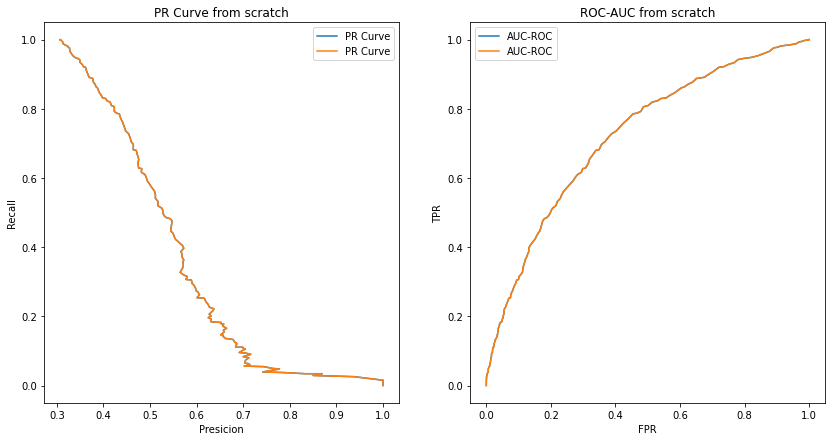

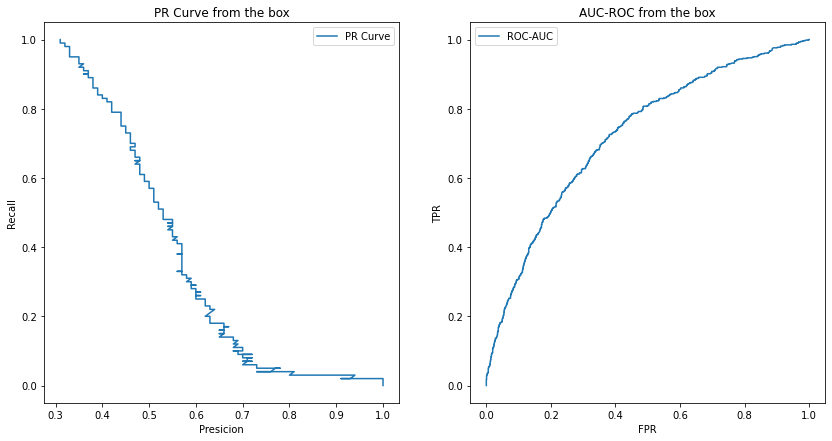

In [145]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

precision, recall, thresholds = precision_recall_curve(Y_test, y_pred[:, 1])


precision, recall = np.round(precision, 2), np.round(recall, 2)
fpr, tpr, _ = roc_curve(Y_test, y_pred[:, 1])


fig = plt.figure(figsize = (14,7))
ax1 = plt.subplot(121)
ax1.plot(precision_array, tpr_array, label='PR Curve')
plt.xlabel('Presicion')
plt.ylabel('Recall')
plt.legend(loc='best')
plt.title('PR Curve from scratch')


ax2 = plt.subplot(122)
ax2.plot(fpr_array, tpr_array, label='AUC-ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.title('ROC-AUC from scratch')
plt.show()


fig = plt.figure(figsize = (14,7))
ax1 = plt.subplot(121)
ax1.plot(precision, recall, label='PR Curve')
plt.xlabel('Presicion')
plt.ylabel('Recall')
plt.legend(loc='best')
plt.title('PR Curve from the box')


ax2 = plt.subplot(122)
ax2.plot(fpr, tpr, label='ROC-AUC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.title('AUC-ROC from the box')
plt.show()

# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [146]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [147]:
# посмотрим что получилось
# for line in zip( pr, re, thres ):
#     print( line )

In [148]:
from sklearn.metrics import average_precision_score

In [149]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.3161313691594922

In [150]:
### ROC

In [151]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [152]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [153]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9292091218347356)
(0.0007558578987150416, 0.0, 0.9292091218347356)
(0.0030234315948601664, 0.0, 0.9015483828909511)
(0.0030234315948601664, 0.0017035775127768314, 0.89998863076942)
(0.007558578987150416, 0.0017035775127768314, 0.868400866190377)
(0.007558578987150416, 0.005110732538330494, 0.8650840062760865)
(0.010582010582010581, 0.005110732538330494, 0.8546531438826546)
(0.010582010582010581, 0.008517887563884156, 0.8521927027093201)
(0.01436130007558579, 0.008517887563884156, 0.8338303291344934)
(0.01436130007558579, 0.010221465076660987, 0.8336073154968104)
(0.024943310657596373, 0.010221465076660987, 0.8081343428245285)
(0.024943310657596373, 0.01192504258943782, 0.8072220565321198)
(0.027210884353741496, 0.01192504258943782, 0.7990301982198432)
(0.027210884353741496, 0.015332197614991482, 0.7918452059958397)
(0.034013605442176874, 0.015332197614991482, 0.7731701466797716)
(0.034013605442176874, 0.017035775127768313, 0.7726181721034869)
(0.03552532123960695, 0.017035

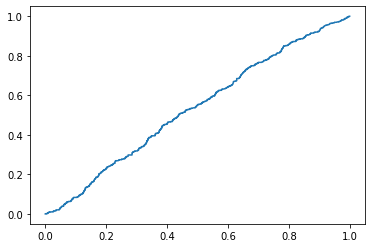

In [154]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [155]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()


,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [156]:
model2 = LogisticRegression()

In [157]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [158]:
model2.fit( X_train_short, Y_train )

LogisticRegression()

In [159]:
predictions2 = model2.predict_proba( X_test_short )

In [160]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

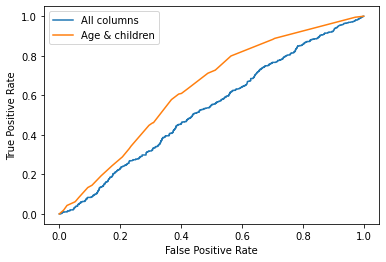

In [161]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [162]:
from sklearn.metrics import roc_curve

In [163]:
from sklearn.metrics import roc_auc_score

roc_auc_score( Y_test, predictions[:, 1] )

In [164]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [165]:
from sklearn.metrics import auc

In [166]:
auc( fpr, tpr )

0.5332242683179651

auc( fpr2, tpr2 )

In [167]:
## Пример влияния L1 и L2-регуляризации

In [168]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [169]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [170]:
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [171]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

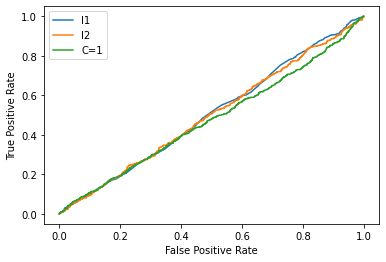

In [172]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [173]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [174]:
Y = data['affair']

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [176]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )

In [177]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [178]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

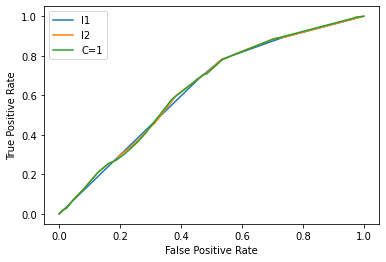

In [179]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()


In [180]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

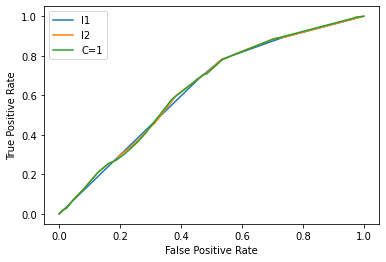

In [181]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()